In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [7]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | fez
Processing Record 3 of Set 1 | zhangye
Processing Record 4 of Set 1 | manavalakurichi
Processing Record 5 of Set 1 | kilmez
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | wad madani
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | san pedro
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | fukue
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 

Processing Record 36 of Set 4 | ilulissat
Processing Record 37 of Set 4 | brae
Processing Record 38 of Set 4 | togur
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | lasa
Processing Record 42 of Set 4 | krasnyy chikoy
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | colares
Processing Record 45 of Set 4 | san angelo
Processing Record 46 of Set 4 | casma
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | kurunegala
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | mocambique
City not found. Skipping...
Processing Record 1 of Set 5 | sobolevo
Processing Record 2 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 5 | paamiut
Processing Record 4 of Set 5 | cap malheureux
Processing Record 5 of Set 5 | flin flon
Processing Record 6 of Set 5 | siguiri
Processing Record 7 of Set 5 | nouadhibou
Processing Record 8 of Set 5 | yar-sale

Processing Record 25 of Set 8 | lishui
Processing Record 26 of Set 8 | motala
Processing Record 27 of Set 8 | bardiyah
Processing Record 28 of Set 8 | beaufort
Processing Record 29 of Set 8 | kaeo
Processing Record 30 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 8 | clyde river
Processing Record 32 of Set 8 | novobirilyussy
Processing Record 33 of Set 8 | zhangjiakou
Processing Record 34 of Set 8 | nizwa
Processing Record 35 of Set 8 | trat
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | honiara
Processing Record 38 of Set 8 | xining
Processing Record 39 of Set 8 | vallenar
Processing Record 40 of Set 8 | aracati
Processing Record 41 of Set 8 | itarema
Processing Record 42 of Set 8 | canavieiras
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | skjervoy
Processing Record 45 of Set 8 | sitka
Processing Record 46 of Set 8 | codrington
Processing Record 47 of Set 8 | nago
Processing Record 48 of Set 8 | probistip

Processing Record 9 of Set 12 | mujiayingzi
Processing Record 10 of Set 12 | puerto ayacucho
Processing Record 11 of Set 12 | mbandaka
Processing Record 12 of Set 12 | serov
Processing Record 13 of Set 12 | guarapari
Processing Record 14 of Set 12 | mulchen
Processing Record 15 of Set 12 | mayo
Processing Record 16 of Set 12 | christchurch
Processing Record 17 of Set 12 | stanovoye
Processing Record 18 of Set 12 | changji
Processing Record 19 of Set 12 | konevo
Processing Record 20 of Set 12 | mayumba
Processing Record 21 of Set 12 | mrirt
City not found. Skipping...
Processing Record 22 of Set 12 | porto murtinho
Processing Record 23 of Set 12 | libreville
Processing Record 24 of Set 12 | sao felix do xingu
Processing Record 25 of Set 12 | boshnyakovo
Processing Record 26 of Set 12 | ranong
Processing Record 27 of Set 12 | matara
Processing Record 28 of Set 12 | troitsko-pechorsk
Processing Record 29 of Set 12 | ishigaki
Processing Record 30 of Set 12 | lesnikovo
Processing Record 31 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Comodoro Rivadavia,-45.8667,-67.5000,53.60,82,20,0.87,AR,2021-04-23 22:48:30
1,Fez,34.0372,-4.9998,62.60,82,75,6.91,MA,2021-04-23 22:49:04
2,Zhangye,38.9342,100.4517,39.60,80,100,4.14,CN,2021-04-23 22:49:31
3,Manavalakurichi,8.1333,77.3000,84.20,84,20,4.61,IN,2021-04-23 22:49:31
4,Punta Arenas,-53.1500,-70.9167,46.40,87,75,4.61,CL,2021-04-23 22:46:26
5,Esperance,-33.8667,121.9000,57.20,88,97,10.36,AU,2021-04-23 22:49:32
6,Pisco,-13.7000,-76.2167,68.00,77,0,9.22,PE,2021-04-23 22:48:42
7,Wad Madani,14.4012,33.5199,90.30,29,56,9.13,SD,2021-04-23 22:49:32
8,East London,-33.0153,27.9116,63.88,76,8,9.22,ZA,2021-04-23 22:49:33
9,Cape Town,-33.9258,18.4232,59.00,82,0,8.05,ZA,2021-04-23 22:46:43


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
                    
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Comodoro Rivadavia,AR,2021-04-23 22:48:30,-45.8667,-67.5000,53.60,82,20,0.87
1,Fez,MA,2021-04-23 22:49:04,34.0372,-4.9998,62.60,82,75,6.91
2,Zhangye,CN,2021-04-23 22:49:31,38.9342,100.4517,39.60,80,100,4.14
3,Manavalakurichi,IN,2021-04-23 22:49:31,8.1333,77.3000,84.20,84,20,4.61
4,Punta Arenas,CL,2021-04-23 22:46:26,-53.1500,-70.9167,46.40,87,75,4.61
...,...,...,...,...,...,...,...,...,...
565,Lagoa,PT,2021-04-23 22:48:33,39.0500,-27.9833,57.74,78,20,32.30
566,Lorengau,PG,2021-04-23 22:53:19,-2.0226,147.2712,81.63,77,94,3.69
567,Iquitos,PE,2021-04-23 22:53:20,-3.7481,-73.2472,80.60,83,40,3.44
568,Pingliang,CN,2021-04-23 22:53:20,35.5392,106.6861,48.63,96,100,5.41


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") 

In [11]:
# Extract relevant fields from th eDataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

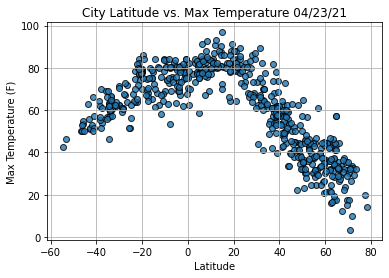

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

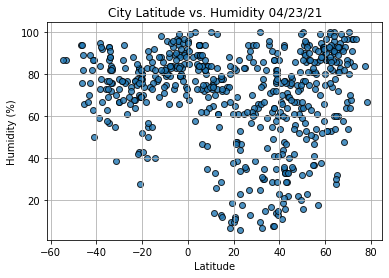

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

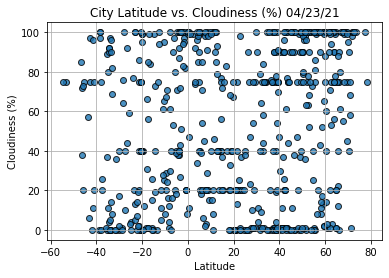

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

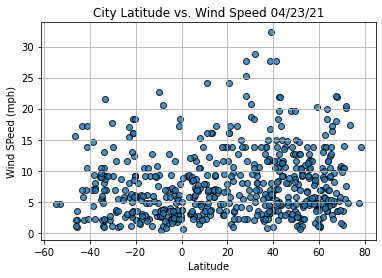

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind SPeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                        Fukue
Country                        JP
Date          2021-04-23 22:49:34
Lat                       32.6881
Lng                       128.842
Max Temp                    64.89
Humidity                       75
Cloudiness                     84
Wind Speed                    9.8
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
565     True
566    False
567    False
568     True
569    False
Name: Lat, Length: 570, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Fez,MA,2021-04-23 22:49:04,34.0372,-4.9998,62.6,82,75,6.91
2,Zhangye,CN,2021-04-23 22:49:31,38.9342,100.4517,39.6,80,100,4.14
3,Manavalakurichi,IN,2021-04-23 22:49:31,8.1333,77.3000,84.2,84,20,4.61
7,Wad Madani,SD,2021-04-23 22:49:32,14.4012,33.5199,90.3,29,56,9.13
10,San Pedro,PH,2021-04-23 22:49:33,14.3500,121.0167,81.0,78,40,5.75


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

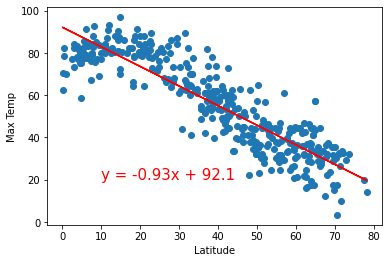

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp",(10,20))

In [33]:
linregress(x_values, y_values)

LinregressResult(slope=0.5339690771362128, intercept=80.25777005526614, rvalue=0.7226347419162332, pvalue=7.640700844322389e-31, stderr=0.0379647561148513)

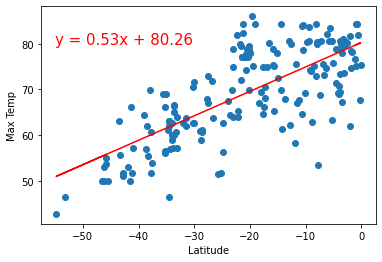

In [29]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature", "Max Temp", (-55,80))

In [32]:
linregress(x_values, y_values)

LinregressResult(slope=0.5339690771362128, intercept=80.25777005526614, rvalue=0.7226347419162332, pvalue=7.640700844322389e-31, stderr=0.0379647561148513)

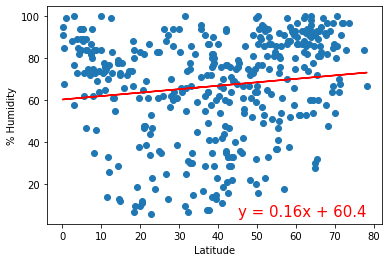

In [35]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Humidity", "% Humidity", (45,5))

In [38]:
linregress(x_values, y_values)

LinregressResult(slope=0.16397550540255845, intercept=60.401779373708, rvalue=0.13592027509734264, pvalue=0.007413973561258563, stderr=0.06091373107359584)

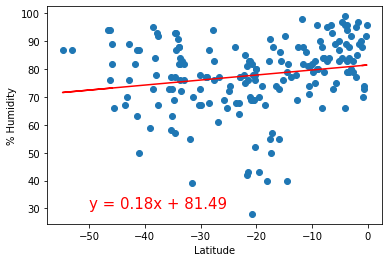

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for % Humidity", "% Humidity",(-50,30))

In [42]:
linregress(x_values, y_values)

LinregressResult(slope=0.18019083412593348, intercept=81.48862257864783, rvalue=0.18921841414849133, pvalue=0.01030636459661827, stderr=0.0695044739829827)

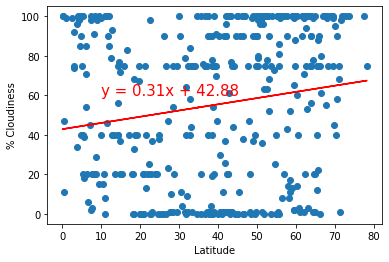

In [47]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness", "% Cloudiness",(10,60))

In [46]:
linregress(x_values, y_values)

LinregressResult(slope=0.31424807155998785, intercept=42.883983907949535, rvalue=0.1680685624902791, pvalue=0.0009026167078894312, stderr=0.09393635551458958)

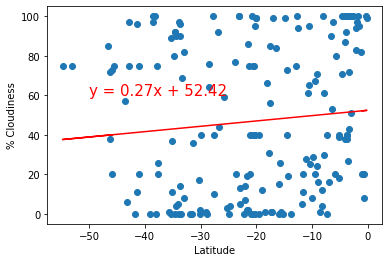

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [50]:
linregress(x_values, y_values)

LinregressResult(slope=0.27004426025039696, intercept=52.4246765175166, rvalue=0.09786560448225415, pvalue=0.187505021245761, stderr=0.2041154086188591)

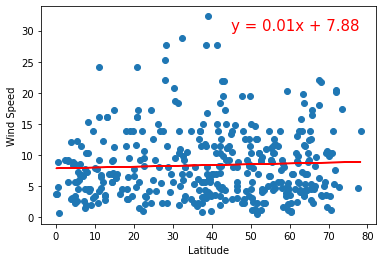

In [55]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Wind Speed", "Wind Speed", (45,30))

In [57]:
linregress(x_values, y_values)

LinregressResult(slope=0.0131613985519263, intercept=7.879872229185781, rvalue=0.048362474436122745, pvalue=0.34268184230089715, stderr=0.013853345826008471)

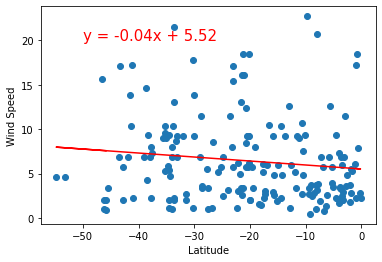

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Wind Speed", "Wind Speed",(-50,20))

In [60]:
linregress(x_values, y_values)

LinregressResult(slope=-0.04481125055209386, intercept=5.524129948558707, rvalue=-0.12778353795938543, pvalue=0.08473439757122123, stderr=0.02585222239530508)